In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


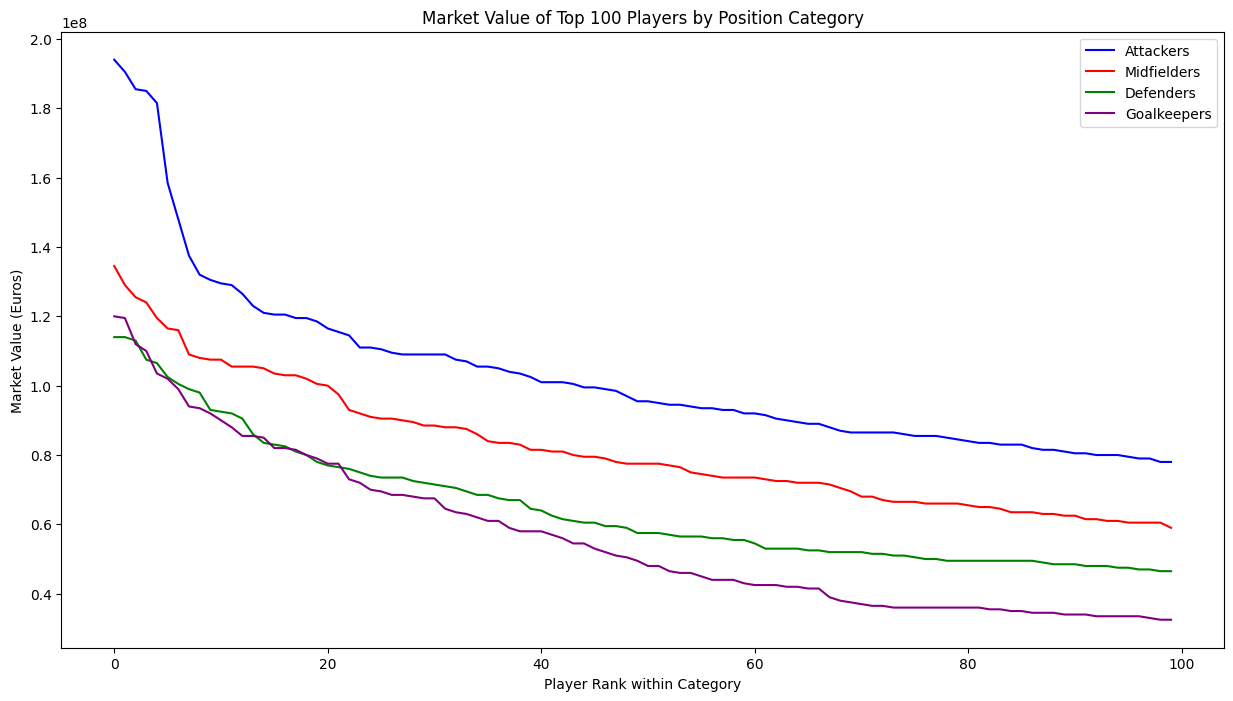

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/gdrive/MyDrive/male_players.csv')

# Define the function to categorize player positions
def categorize_position(position):
    if any(pos in position for pos in ['ST', 'CF', 'RW', 'LW']):
        return 'Attacker'
    elif any(pos in position for pos in ['CAM', 'CDM', 'CM', 'LM', 'RM']):
        return 'Midfielder'
    elif any(pos in position for pos in ['CB', 'LB', 'RB', 'RWB', 'LWB']):
        return 'Defender'
    elif 'GK' in position:
        return 'Goalkeeper'
    else:
        return 'Other'

# Apply the function to categorize players
data['position_category'] = data['player_positions'].apply(categorize_position)

# Filtering and sorting top 100 players for each position category
top_100_attackers = data[data['position_category'] == 'Attacker'].nlargest(100, 'value_eur')
top_100_midfielders = data[data['position_category'] == 'Midfielder'].nlargest(100, 'value_eur')
top_100_defenders = data[data['position_category'] == 'Defender'].nlargest(100, 'value_eur')
top_100_goalkeepers = data[data['position_category'] == 'Goalkeeper'].nlargest(100, 'value_eur')

# Plotting market values for all top 100 players in each position category on the same graph
plt.figure(figsize=(15, 8))
plt.plot(top_100_attackers['value_eur'].reset_index(drop=True), label='Attackers', color='blue')
plt.plot(top_100_midfielders['value_eur'].reset_index(drop=True), label='Midfielders', color='red')
plt.plot(top_100_defenders['value_eur'].reset_index(drop=True), label='Defenders', color='green')
plt.plot(top_100_goalkeepers['value_eur'].reset_index(drop=True), label='Goalkeepers', color='purple')

plt.title('Market Value of Top 100 Players by Position Category')
plt.xlabel('Player Rank within Category')
plt.ylabel('Market Value (Euros)')
plt.legend()
plt.show()


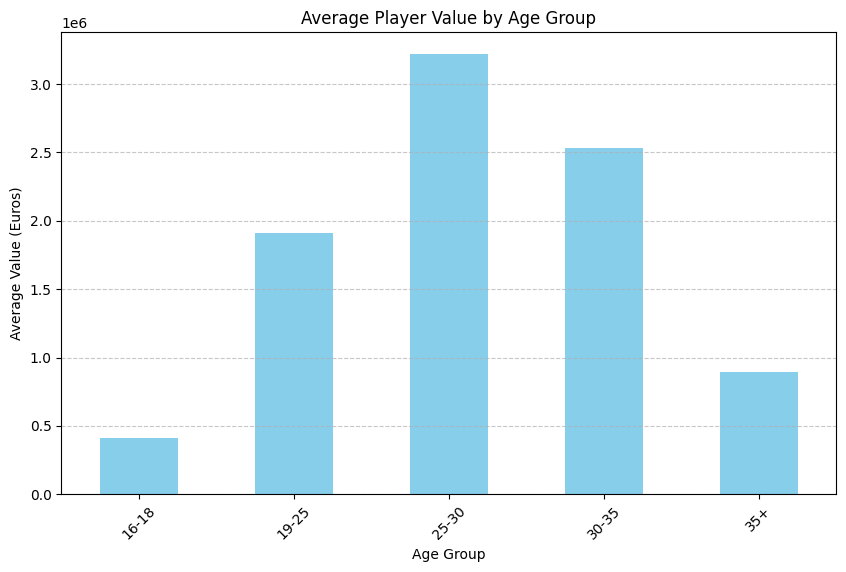

In [ ]:

bins = [15, 18, 25, 30, 35, 100]
labels = ['16-18', '19-25', '25-30', '30-35', '35+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)


age_group_values = data.groupby('age_group')['value_eur'].mean()

plt.figure(figsize=(10, 6))
age_group_values.plot(kind='bar', color='skyblue')
plt.title('Average Player Value by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Value (Euros)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


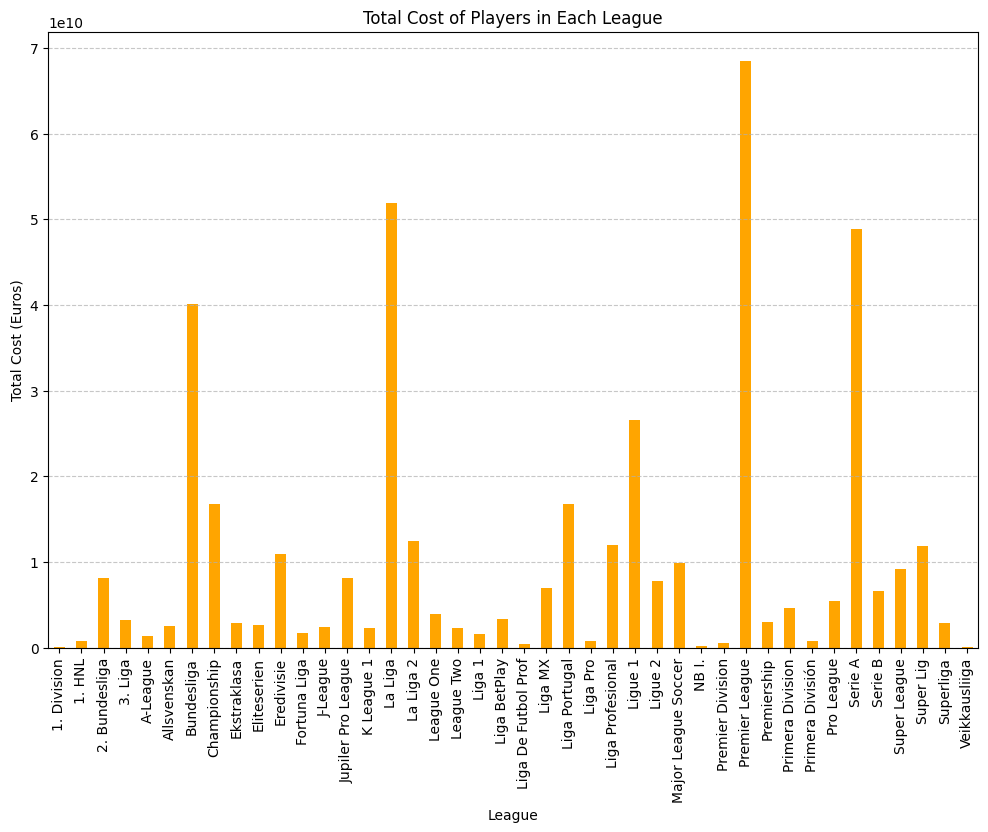

In [ ]:

league_costs = data.groupby('league_name')['value_eur'].sum()

plt.figure(figsize=(12, 8))
league_costs.plot(kind='bar', color='orange')
plt.title('Total Cost of Players in Each League')
plt.xlabel('League')
plt.ylabel('Total Cost (Euros)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


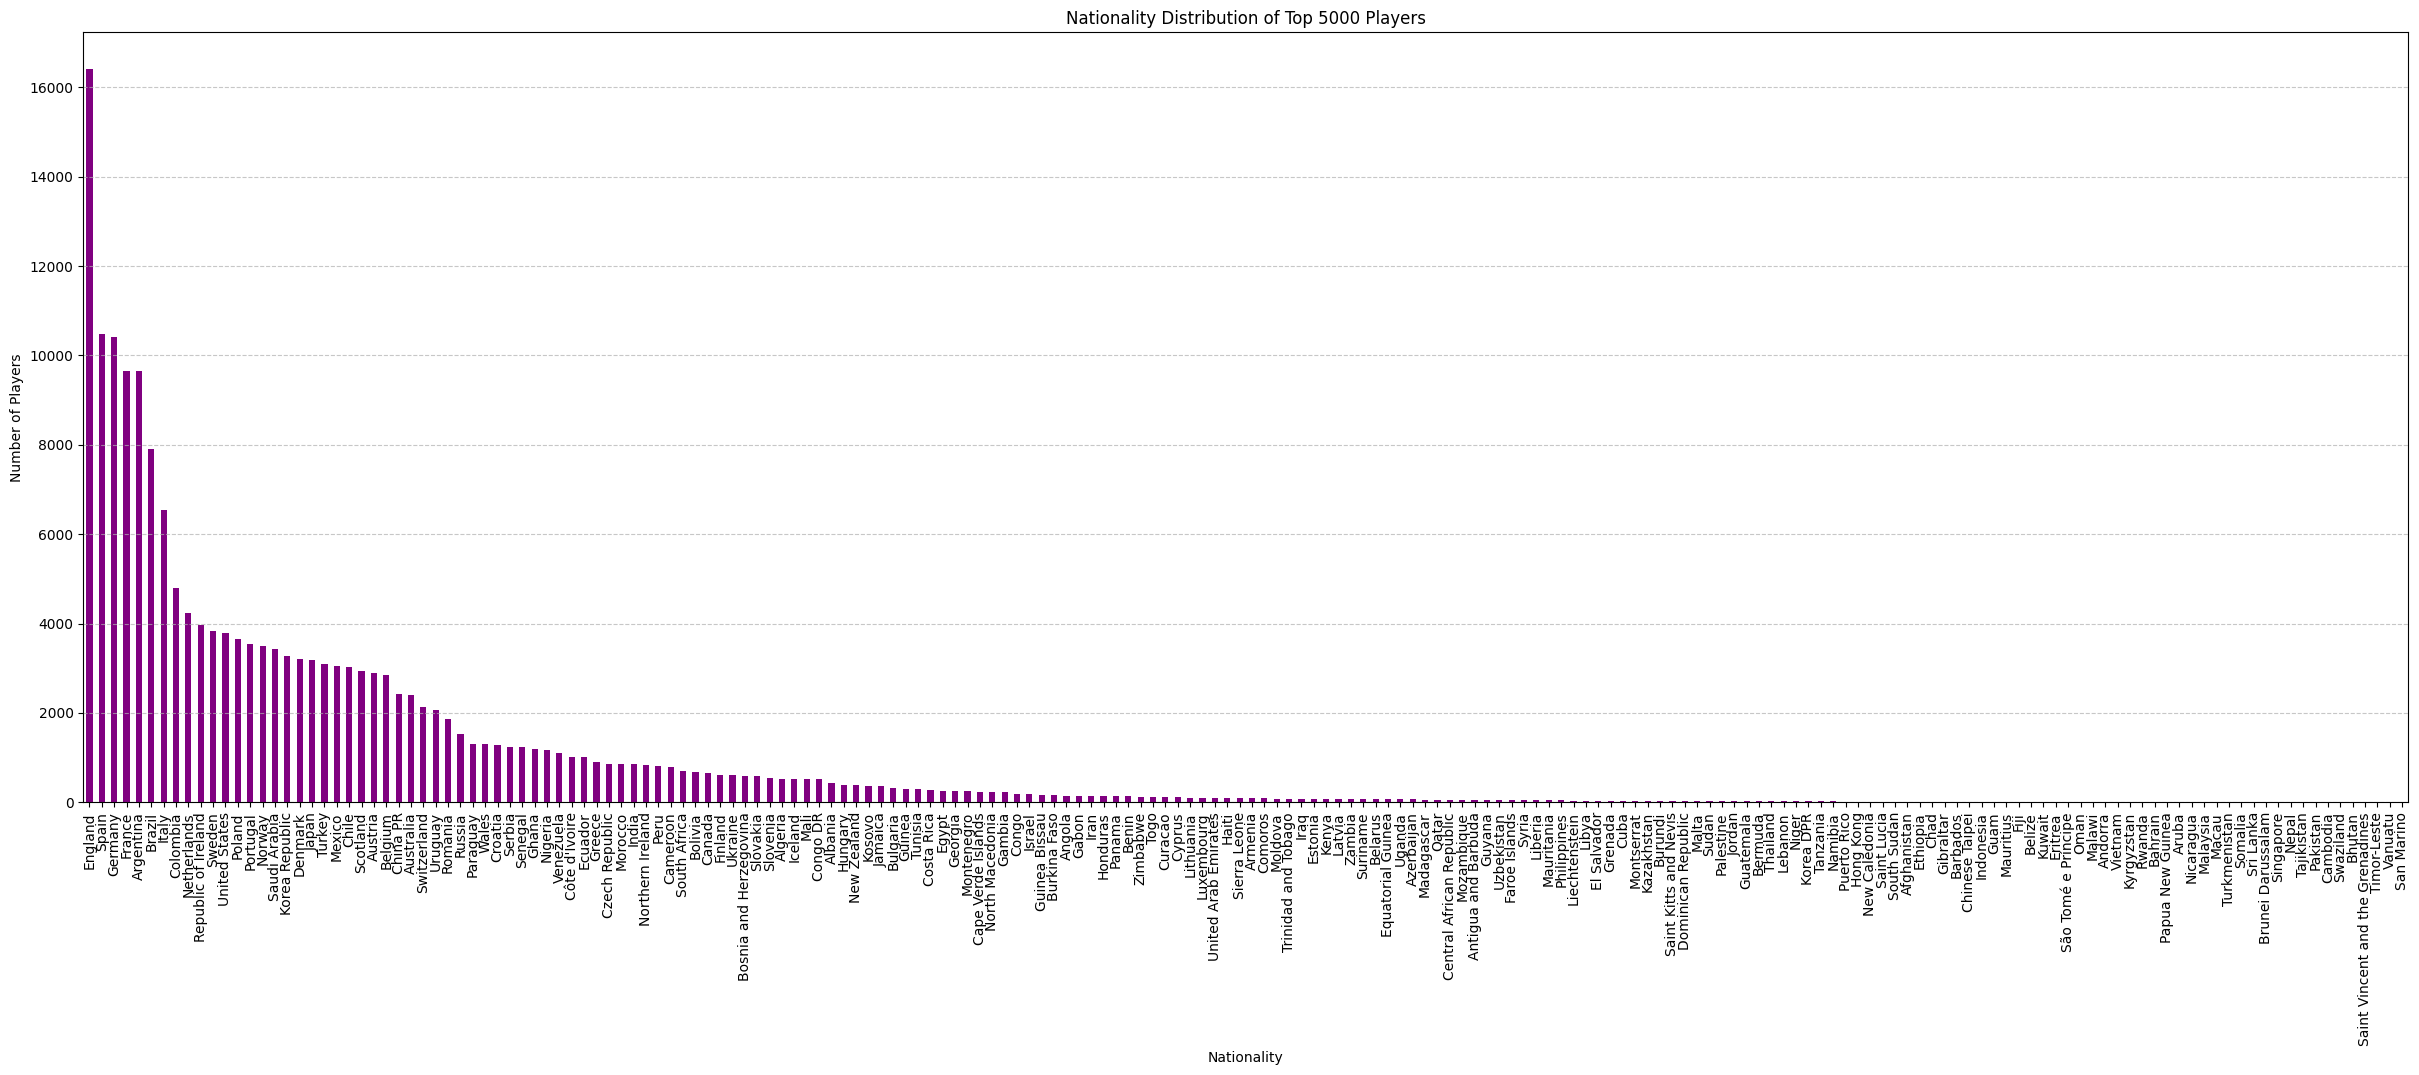

In [ ]:

players = data.sort_values(by='overall', ascending=False)

nationality_counts = players['nationality_name'].value_counts()

plt.figure(figsize=(30, 10))
nationality_counts.plot(kind='bar', color='purple')
plt.title('Nationality Distribution of Top 5000 Players')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


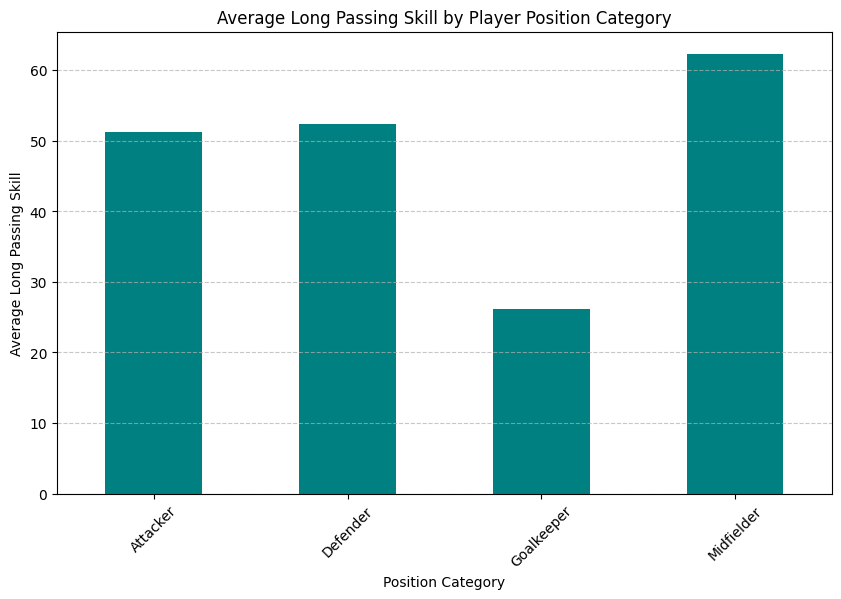

In [ ]:


data['position_category'] = data['player_positions'].apply(categorize_position)


position_long_passing_skills = data.groupby('position_category')['skill_long_passing'].mean()


plt.figure(figsize=(10, 6))
position_long_passing_skills.plot(kind='bar', color='teal')
plt.title('Average Long Passing Skill by Player Position Category')
plt.xlabel('Position Category')
plt.ylabel('Average Long Passing Skill')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
